In [3]:
import pandas as pd

# Load data from the Excel file
df = pd.read_excel("sales_data.xlsx")  # make sure the file name matches exactly

# Ensure 'Date' is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort data just in case
df = df.sort_values('Date')

df.head()


,Date,Sales
0,2022-01-01,250
1,2022-01-02,240
2,2022-01-03,231
3,2022-01-04,221
4,2022-01-05,212


In [5]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 5.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 4.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.7 MB 3.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 4.5/8.7 MB 4.2 MB/s eta 0:00:02
   ------------------------ --------------- 5.2/8.7 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 4.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    ---------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to numeric values (days since start)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

X = df[['Days']]
y = df['Sales']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict existing data for check
df['Predicted'] = model.predict(X)

df.head()


,Date,Sales,Days,Predicted
0,2022-01-01,250,0,174.110378
1,2022-01-02,240,1,174.614695
2,2022-01-03,231,2,175.119012
3,2022-01-04,221,3,175.623329
4,2022-01-05,212,4,176.127647


In [8]:
# Forecast for the next 6 months
future_days = np.array(range(df['Days'].max() + 30, df['Days'].max() + 30*7, 30)).reshape(-1, 1)

future_sales = model.predict(future_days)

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=df['Date'].max() + pd.Timedelta(days=30), periods=6, freq='M'),
    'Predicted_Sales': future_sales
})

forecast_df


C:\Users\kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kumar\AppData\Local\Temp\ipykernel_9224\3473842480.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start=df['Date'].max() + pd.Timedelta(days=30), periods=6, freq='M'),


,Date,Predicted_Sales
0,2023-08-31,466.110048
1,2023-09-30,481.239564
2,2023-10-31,496.369081
3,2023-11-30,511.498598
4,2023-12-31,526.628114
5,2024-01-31,541.757631


In [10]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.5 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.5 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 4.2 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.2 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 4.1 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 4.0 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.2 MB 4.0 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


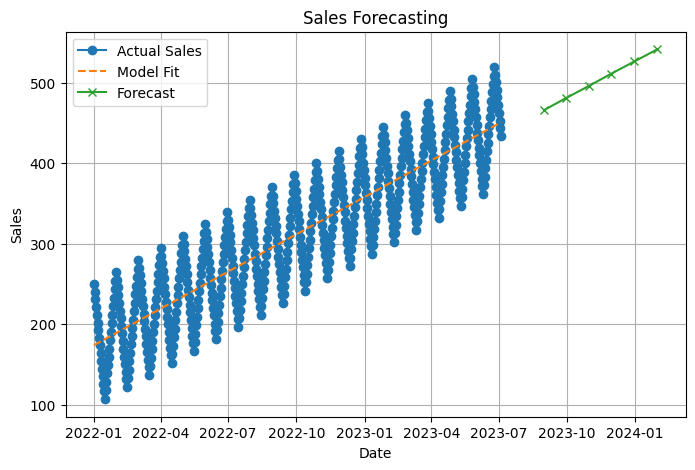

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df['Date'], df['Sales'], label='Actual Sales', marker='o')
plt.plot(df['Date'], df['Predicted'], label='Model Fit', linestyle='--')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Sales'], label='Forecast', marker='x')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting')
plt.legend()
plt.grid(True)
plt.show()
